<a href="https://colab.research.google.com/github/LAKSHAYRATRA/Machine_Learning/blob/main/DBScan_and_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DB SCAN**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

In [3]:
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

In [4]:
eps = 0.2
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

In [5]:
if len(set(labels)) > 1:
    sil_score = silhouette_score(X, labels)
    print(f"Silhouette Score: {sil_score:.2f}")

    sil_samples = silhouette_samples(X, labels)
else:
    print("DBSCAN found only one cluster. Silhouette score is not applicable.")

Silhouette Score: 0.32


In [6]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

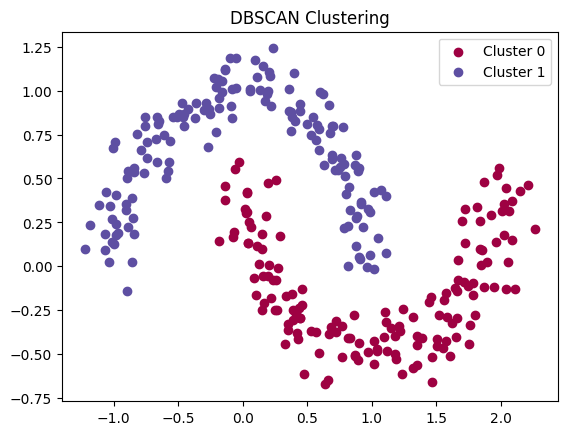

In [7]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise points

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering")
plt.legend()
plt.show()

# K MEANS

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [10]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

In [11]:
wcss = []
k_range = range(1, 11)

In [12]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

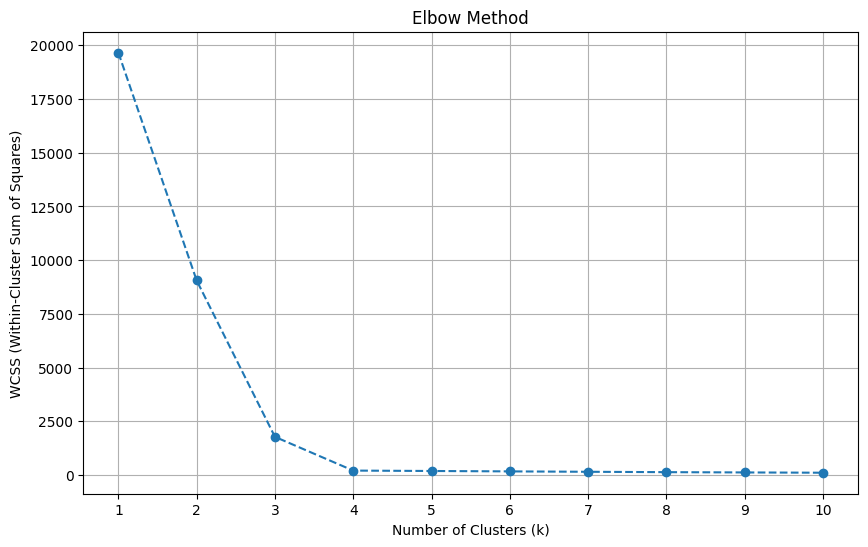

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker="o", linestyle="--")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [14]:
optimal_k = 4
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 4


In [15]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)

In [16]:
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.88


In [17]:
sil_samples = silhouette_samples(X, labels)

Text(0.5, 0.98, 'K-Means Clustering and Silhouette Analysis (k=4)')

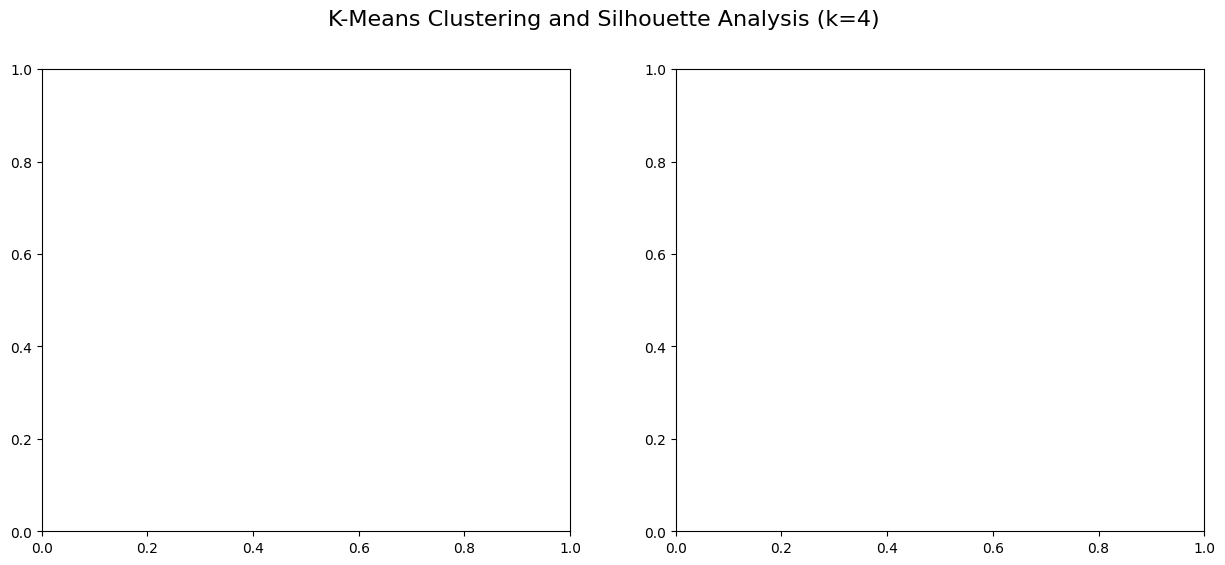

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f"K-Means Clustering and Silhouette Analysis (k={optimal_k})", fontsize=16)

In [22]:
y_lower = 10
for i in range(optimal_k):
    cluster_silhouette_values = sil_samples[labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Add space between clusters

ax1.set_title("Silhouette Plot")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster")
ax1.axvline(x=sil_score, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (optimal_k + 1) * 10])

(0.0, 350.0)

In [23]:
colors = cm.nipy_spectral(labels.astype(float) / optimal_k)
ax2.scatter(X[:, 0], X[:, 1], marker="o", s=50, lw=0, c=colors, edgecolor="k")
centers = kmeans.cluster_centers_
ax2.scatter(
    centers[:, 0], centers[:, 1], marker="x", c="white", alpha=1, s=200, edgecolor="k"
)

ax2.set_title("K-Means Clustering")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.show()

<ipython-input-23-9a72f44785c5>:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(
